In [69]:
import pandas as pd
import numpy as np
import os
import ast
from datetime import date, datetime
%matplotlib inline

In [49]:
df = pd.read_csv(os.path.join('data', 'combined_metadata.csv'))
df = df.drop(['Unnamed: 0', 'imdbId', 'tmdbId', 'movieId'], axis=1)
df['id'] = df['id'].astype('str')
df.head()

,adult,budget,genres,id,original_language,production_countries,revenue,runtime,spoken_languages,views,likes,dislikes,n_trailers
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",8050136,6330,1965,3
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",83048,70,14,1
2,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",104948,0,0,1
3,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",32419,119,1,1
4,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6162,12,3,2


In [50]:
date_df = pd.read_csv(os.path.join('data', 'movies_metadata.csv'))[['id', 'release_date']]
date_df['id'][0]

'862'

In [51]:
df['id'][0]

'862'

In [52]:
all_df = pd.merge(df, date_df, on='id')

In [53]:
all_df.head()

,adult,budget,genres,id,original_language,production_countries,revenue,runtime,spoken_languages,views,likes,dislikes,n_trailers,release_date
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",8050136,6330,1965,3,1995-10-30
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",83048,70,14,1,1995-12-15
2,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",104948,0,0,1,1995-12-22
3,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",32419,119,1,1,1995-12-15
4,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6162,12,3,2,1995-12-22


In [64]:
dates = []
for strdate in all_df['release_date']:
    dates.append(datetime.strptime(strdate, '%Y-%m-%d'))

In [65]:
epoch = min(dates)
epoch

datetime.datetime(1915, 2, 8, 0, 0)

In [66]:
daysSinceEpoch = []
for date in dates:
    daysSinceEpoch.append((date - epoch).days)

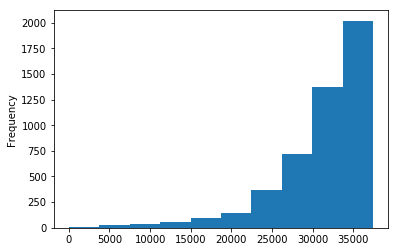

In [70]:
all_df['daysSinceStart'] = daysSinceEpoch
all_df.daysSinceStart.plot.hist()

In [74]:
dayInYear = []
for mdate in dates:
    dayInYear.append((mdate.date() - date(mdate.year, 1, 1)).days)

In [76]:
all_df['dayInYear'] = dayInYear

In [77]:
all_df.head()

,adult,budget,genres,id,original_language,production_countries,revenue,runtime,spoken_languages,views,likes,dislikes,n_trailers,release_date,daysSinceStart,dayInYear
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",8050136,6330,1965,3,1995-10-30,29484,302
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",83048,70,14,1,1995-12-15,29530,348
2,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",104948,0,0,1,1995-12-22,29537,355
3,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",32419,119,1,1,1995-12-15,29530,348
4,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6162,12,3,2,1995-12-22,29537,355


In [78]:
all_df = all_df.drop('release_date', axis=1)

In [79]:
all_df.head()

,adult,budget,genres,id,original_language,production_countries,revenue,runtime,spoken_languages,views,likes,dislikes,n_trailers,daysSinceStart,dayInYear
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",8050136,6330,1965,3,29484,302
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",83048,70,14,1,29530,348
2,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",104948,0,0,1,29537,355
3,False,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",32419,119,1,1,29530,348
4,False,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",6162,12,3,2,29537,355


In [ ]:
all_df.to_csv(os.path.join('data', ))